In [14]:
import folium
import osmnx as ox
import requests
import polyline
import math

# Substitua 'your_mapbox_token' pelo seu token de acesso do Mapbox
mapbox_token = 'SEU_TOKEN'

# Nome do bairro e nome da cidade (São José dos Pinhais, Brasil)
bairro = "Centro"
cidade = "São José dos Pinhais, Brasil"

# Obter o grafo de ruas do bairro usando o OSM
G = ox.graph_from_place(bairro + ", " + cidade, network_type='drive')

# Calcular o centro do bairro
centro_bairro = ox.geocode(bairro + ", " + cidade)

# Obter as coordenadas das ruas do grafo
nodes = list(G.nodes())
coordinates = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in nodes]

# Criar grupos de coordenadas com no máximo 25 coordenadas cada
max_coordinates_per_request = 25
coordinate_groups = [coordinates[i:i + max_coordinates_per_request] for i in range(0, len(coordinates), max_coordinates_per_request)]

# Função para chamar a API do Mapbox Directions
def get_directions(coordinates):
    base_url = 'https://api.mapbox.com/directions/v5/mapbox/driving/'
    waypoints = ';'.join([f'{coord[1]},{coord[0]}' for coord in coordinates])
    request_url = f'{base_url}{waypoints}?access_token={mapbox_token}&geometries=polyline&steps=true'
    response = requests.get(request_url)
    data = response.json()
    return data

# Calculate the angle between two points
def get_angle(p1, p2):
    x_diff = p2[1] - p1[1]
    y_diff = p2[0] - p1[0]
    return math.degrees(math.atan2(y_diff, x_diff))

# Obter o grafo de ruas do bairro usando o OSM
G = ox.graph_from_place(bairro + ", " + cidade, network_type='drive')

# Calcular o centro do bairro
centro_bairro = ox.geocode(bairro + ", " + cidade)

# Obter as coordenadas das ruas do grafo
nodes = list(G.nodes())
coordinates = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in nodes]

# Criar grupos de coordenadas com no máximo 25 coordenadas cada
max_coordinates_per_request = 25
coordinate_groups = [coordinates[i:i + max_coordinates_per_request] for i in range(0, len(coordinates), max_coordinates_per_request)]

# Função para chamar a API do Mapbox Directions
def get_directions(coordinates):
    base_url = 'https://api.mapbox.com/directions/v5/mapbox/driving/'
    waypoints = ';'.join([f'{coord[1]},{coord[0]}' for coord in coordinates])
    request_url = f'{base_url}{waypoints}?access_token={mapbox_token}&geometries=polyline&steps=true'
    response = requests.get(request_url)
    data = response.json()
    return data

# Calculate the angle between two points
def get_angle(p1, p2):
    x_diff = p2[1] - p1[1]
    y_diff = p2[0] - p1[0]
    return math.degrees(math.atan2(y_diff, x_diff))

# Obter o grafo de ruas do bairro usando o OSM
G = ox.graph_from_place(bairro + ", " + cidade, network_type='drive')

# Calcular o centro do bairro
centro_bairro = ox.geocode(bairro + ", " + cidade)

# Obter as coordenadas das ruas do grafo
nodes = list(G.nodes())
coordinates = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in nodes]

# Criar grupos de coordenadas com no máximo 25 coordenadas cada
max_coordinates_per_request = 25
coordinate_groups = [coordinates[i:i + max_coordinates_per_request] for i in range(0, len(coordinates), max_coordinates_per_request)]

# Função para chamar a API do Mapbox Directions
def get_directions(coordinates):
    base_url = 'https://api.mapbox.com/directions/v5/mapbox/driving/'
    waypoints = ';'.join([f'{coord[1]},{coord[0]}' for coord in coordinates])
    request_url = f'{base_url}{waypoints}?access_token={mapbox_token}&geometries=polyline&steps=true&language=pt'
    response = requests.get(request_url)
    data = response.json()
    return data

# Calculate the angle between two points
def get_angle(p1, p2):
    x_diff = p2[1] - p1[1]
    y_diff = p2[0] - p1[0]
    return math.degrees(math.atan2(y_diff, x_diff))

# Create the map with the sidebar
mymap = folium.Map(location=centro_bairro, zoom_start=15)

# Adicionar marcadores para cada nó do grafo
for node in G.nodes():
    lat, lon = G.nodes[node]['y'], G.nodes[node]['x']
    folium.Marker(location=[lat, lon], popup=f'Node: {node}', icon=folium.Icon(color='blue')).add_to(mymap)

# Variável para armazenar todas as coordenadas da rota completa
all_route_coordinates = []

# Variável para armazenar todas as direções da rota completa
all_route_directions = []

# Iterar sobre os grupos de coordenadas
for group in coordinate_groups:
    # Chamar a API do Mapbox Directions com um dos grupos de coordenadas
    data = get_directions(group)

    # Verificar se a chave 'routes' existe na resposta
    if 'routes' not in data:
        continue

    # Decodificar a string de geometria da rota usando o pacote polyline
    route_geometry = polyline.decode(data['routes'][0]['geometry'])
    route_coordinates = [(lat, lon) for lat, lon in route_geometry]

    # Adicionar as coordenadas do segmento da rota à lista de coordenadas da rota completa
    all_route_coordinates.extend(route_coordinates)

    # Obter as direções da rota
    steps = data['routes'][0]['legs'][0]['steps']
    for step in steps:
                instruction = step['maneuver']['instruction']
                if "Chegou ao seu destino" in instruction:
                    if step == steps[-1]:
                        continue  # Se a instrução "Chegou ao seu destino" for a última da lista, ignorá-la
                    else:
                        all_route_directions.append(instruction)
                else:
                    all_route_directions.append(instruction)

# Add each segment of the route as a separate PolyLine
for i in range(0, len(all_route_coordinates) - 1):
    segment_coords = [all_route_coordinates[i], all_route_coordinates[i + 1]]
    segment_line = folium.PolyLine(locations=segment_coords, color='blue', weight=5)
    mymap.add_child(segment_line)

# Add starting and ending markers
start_marker = folium.Marker(location=all_route_coordinates[0], popup='Ponto de Partida', icon=folium.Icon(color='green'))
end_marker = folium.Marker(location=all_route_coordinates[-1], popup='Ponto de Destino', icon=folium.Icon(color='red'))
mymap.add_child(start_marker)
mymap.add_child(end_marker)

# Add arrows along the route
arrow_points = [all_route_coordinates[i] for i in range(0, len(all_route_coordinates), len(all_route_coordinates) // 20)]
for i, point in enumerate(arrow_points[:-1]):
    angle = get_angle(point, arrow_points[i + 1])
    folium.RegularPolygonMarker(location=point, number_of_sides=3, radius=8,
                                rotation=angle - 90,  # Correção para a orientação da seta
                                color='orange').add_to(mymap)

# Criar o HTML da barra lateral com as instruções da rota
route_list_html = "<ul>"
for direction in all_route_directions:
    route_list_html += f"<li>{direction}</li>"
route_list_html += "</ul>"

# Criar um componente HTML personalizado para a barra lateral
sidebar_html = f"""
    <div style="position: fixed; top: 10px; right: 10px; z-index: 1000;
                background-color: white; padding: 10px; max-height: 80%;
                overflow-y: auto; box-shadow: 0 0 5px rgba(0, 0, 0, 0.3);">
        <h3>Instruções:</h3>
        {route_list_html}
    </div>
"""

# Adicionar a barra lateral ao mapa
mymap.get_root().html.add_child(folium.Element(sidebar_html))

# Exibir o mapa com a barra lateral
#mymap.save('mapa_com_instrucoes_da_rota_marcadores_e_setas.html')
mymap

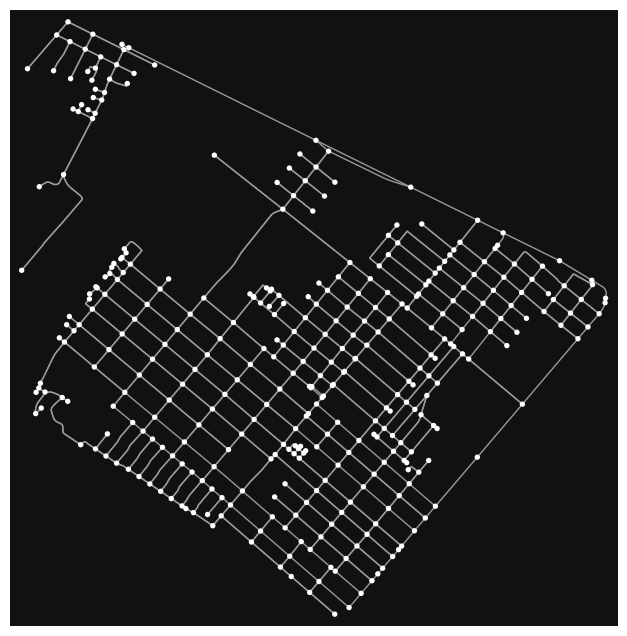

{'routes': [{'weight_name': 'auto', 'weight': 3527.084, 'duration': 2527.31, 'distance': 13917.19, 'legs': [{'via_waypoints': [], 'admins': [{'iso_3166_1_alpha3': 'BRA', 'iso_3166_1': 'BR'}], 'weight': 4.239, 'duration': 3.943, 'steps': [], 'distance': 23.162, 'summary': 'Avenida Rui Barbosa'}, {'via_waypoints': [], 'admins': [{'iso_3166_1_alpha3': 'BRA', 'iso_3166_1': 'BR'}], 'weight': 439.65, 'duration': 390.535, 'steps': [], 'distance': 3060.908, 'summary': 'Avenida Rui Barbosa, Rua Alfredo Pinto'}, {'via_waypoints': [], 'admins': [{'iso_3166_1_alpha3': 'BRA', 'iso_3166_1': 'BR'}], 'weight': 353.303, 'duration': 325.298, 'steps': [], 'distance': 2017.289, 'summary': 'Avenida Rui Barbosa, Rua Alfredo Pinto'}, {'via_waypoints': [], 'admins': [{'iso_3166_1_alpha3': 'BRA', 'iso_3166_1': 'BR'}], 'weight': 136.736, 'duration': 110.993, 'steps': [], 'distance': 444.4, 'summary': 'Rua Floresvaldo Meres de Creddo, Rua Alfredo Pinto'}, {'via_waypoints': [], 'admins': [{'iso_3166_1_alpha3': 'B

C:\Users\Dantas\AppData\Local\Temp\ipykernel_21016\4129546190.py:56: UserWarning:

The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.



In [8]:
import folium
import osmnx as ox
import networkx as nx
import plotly.graph_objs as go
import plotly.offline as offline
import requests

# Substitua 'your_mapbox_token' pelo seu token de acesso do Mapbox
mapbox_token = 'pk.eyJ1Ijoic3RoZWNhbWlsZSIsImEiOiJjbGs5enF3eHgwMjIxM2xuYXhmMWF2M3J3In0.GsOKW7BGbB3isNIHZx8pNg'

# Nome do bairro e nome da cidade (São José dos Pinhais, Brasil)
bairro = "Parque da Fonte"
cidade = "São José dos Pinhais, Brasil"

# Obter o grafo de ruas do bairro usando o OSM
G = ox.graph_from_place(bairro + ", " + cidade, network_type='drive')

# Calcular o centro do bairro
centro_bairro = ox.geocode(bairro + ", " + cidade)

# Plotar o grafo de ruas
ox.plot_graph(G)

# Obter as coordenadas das ruas do grafo
nodes = list(G.nodes())
coordinates = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in nodes]

# Criar grupos de coordenadas com no máximo 25 coordenadas cada
max_coordinates_per_request = 25
coordinate_groups = [coordinates[i:i + max_coordinates_per_request] for i in range(0, len(coordinates), max_coordinates_per_request)]

# Função para chamar a API do Mapbox Directions
def get_directions(coordinates):
    
    base_url = 'https://api.mapbox.com/directions/v5/mapbox/driving/'
    waypoints = ';'.join([f'{coord[1]},{coord[0]}' for coord in coordinates])
    request_url = f'{base_url}{waypoints}?access_token={mapbox_token}&overview=full'
    response = requests.get(request_url)
    data = response.json()
    print(data)
    
    if 'routes' in data and len(data['routes']) > 0:
        # Extrair as instruções de direção para a rota
        instructions = [(step['maneuver']['instruction'], (step['maneuver']['location'][1], step['maneuver']['location'][0]))
                        for leg in data['routes'][0]['legs']
                        for step in leg['steps']]
        return instructions
    else:
        return []

# Obter as instruções de direção para cada grupo de coordenadas
route_instructions = []
for group in coordinate_groups:
    directions_data = get_directions(group)
    route_instructions.extend(directions_data)

# Plotar o grafo de ruas e a rota com as instruções de direção no mapa
G_mapbox = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)
for instruction, coord in route_instructions:
    folium.Marker(location=[coord[0], coord[1]], popup=instruction, icon=folium.Icon(color='blue')).add_to(G_mapbox)

# Salvar o mapa em um arquivo HTML
G_mapbox.save('route_map_with_directions.html')

In [28]:
import folium
import osmnx as ox
import requests
import polyline
import math

# Substitua 'your_mapbox_token' pelo seu token de acesso do Mapbox
mapbox_token = 'pk.eyJ1Ijoic3RoZWNhbWlsZSIsImEiOiJjbGs5enF3eHgwMjIxM2xuYXhmMWF2M3J3In0.GsOKW7BGbB3isNIHZx8pNg'

# Nome do bairro e nome da cidade (São José dos Pinhais, Brasil)
bairro = "Centro"
cidade = "São José dos Pinhais, Brasil"

# Obter o grafo de ruas do bairro usando o OSM
G = ox.graph_from_place(bairro + ", " + cidade, network_type='drive')

# Calcular o centro do bairro
centro_bairro = ox.geocode(bairro + ", " + cidade)

# Obter as coordenadas das ruas do grafo
nodes = list(G.nodes())
coordinates = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in nodes]

# Criar grupos de coordenadas com no máximo 25 coordenadas cada
max_coordinates_per_request = 25
coordinate_groups = [coordinates[i:i + max_coordinates_per_request] for i in range(0, len(coordinates), max_coordinates_per_request)]

# Função para chamar a API do Mapbox Directions
def get_directions(coordinates):
    base_url = 'https://api.mapbox.com/directions/v5/mapbox/driving/'
    waypoints = ';'.join([f'{coord[1]},{coord[0]}' for coord in coordinates])
    request_url = f'{base_url}{waypoints}?access_token={mapbox_token}&geometries=polyline&steps=true&language=pt'
    response = requests.get(request_url)
    data = response.json()
    return data

# Create the map
mymap = folium.Map(location=centro_bairro, zoom_start=15)

# Variável para armazenar todas as coordenadas da rota completa
all_route_coordinates = []

# Variável para armazenar todas as direções da rota completa
all_route_directions = []

# Iterar sobre os grupos de coordenadas
for group in coordinate_groups:
    # Chamar a API do Mapbox Directions com um dos grupos de coordenadas
    data = get_directions(group)

    # Verificar se a chave 'routes' existe na resposta
    if 'routes' not in data:
        continue

    # Decodificar a string de geometria da rota usando o pacote polyline
    route_geometry = polyline.decode(data['routes'][0]['geometry'])
    route_coordinates = [(lat, lon) for lat, lon in route_geometry]

    # Adicionar as coordenadas do segmento da rota à lista de coordenadas da rota completa
    all_route_coordinates.extend(route_coordinates)

    # Obter as direções da rota
    steps = data['routes'][0]['legs'][0]['steps']
    for step in steps:
        instruction = step['maneuver']['instruction']
        if "Chegou ao seu destino" in instruction:
            if step == steps[-1]:
                continue  # Se a instrução "Chegou ao seu destino" for a última da lista, ignorá-la
            else:
                all_route_directions.append(instruction)
        else:
            all_route_directions.append(instruction)

# Add each segment of the route as a separate PolyLine
for i in range(0, len(all_route_coordinates) - 1):
    segment_coords = [all_route_coordinates[i], all_route_coordinates[i + 1]]
    
    # Filtrar segmentos da rota para evitar ligações distantes (distância euclidiana)
    distance = math.sqrt((segment_coords[0][0] - segment_coords[1][0])**2 + (segment_coords[0][1] - segment_coords[1][1])**2)
    if distance < 0.0027:  # Ajuste esse valor conforme necessário
        segment_line = folium.PolyLine(locations=segment_coords, color='blue', weight=5)
        mymap.add_child(segment_line)

# Adicionar ponto de partida (marcador verde)
start_marker = folium.Marker(location=all_route_coordinates[0], popup='Ponto de Partida', icon=folium.Icon(color='green'))
mymap.add_child(start_marker)

# Adicionar ponto de chegada (marcador vermelho)
end_marker = folium.Marker(location=all_route_coordinates[-1], popup='Ponto de Destino', icon=folium.Icon(color='red'))
mymap.add_child(end_marker)

# Criar o HTML da barra lateral com as instruções da rota
route_list_html = "<ul>"
for direction in all_route_directions:
    route_list_html += f"<li>{direction}</li>"
route_list_html += "</ul>"

# Criar um componente HTML personalizado para a barra lateral (pop-up)
popup_html = f"""
    <div style="max-height: 300px; overflow-y: auto;">
        <h3>Instruções:</h3>
        {route_list_html}
    </div>
"""

# Adicionar pop-up com as instruções ao marcador de partida
popup_start = folium.Popup(popup_html, max_width=400)
start_marker.add_child(popup_start)

# Criar o HTML da barra lateral com as instruções da rota
route_list_html = "<ul>"
for direction in all_route_directions:
    route_list_html += f"<li>{direction}</li>"
route_list_html += "</ul>"

# Criar um componente HTML personalizado para a barra lateral
sidebar_html = f"""
    <div style="position: fixed; top: 10px; right: 10px; z-index: 1000;
                background-color: white; padding: 10px; max-height: 80%;
                overflow-y: auto; box-shadow: 0 0 5px rgba(0, 0, 0, 0.3);">
        <h3>Instruções:</h3>
        {route_list_html}
    </div>
"""

# Adicionar a barra lateral ao mapa
mymap.get_root().html.add_child(folium.Element(sidebar_html))

# Exibir o mapa com a barra lateral
mymap.save('mapa_sem_riscos.html')
